In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier

from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




C:\Users\radia\AppData\Local\Temp\ipykernel_7740\1078999800.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
train=pd.read_csv('Data_Train.csv')
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test=pd.read_csv('Test_set.csv')
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
sample=pd.read_csv('Sample_submission.csv')
sample

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [5]:
train.shape

(10683, 11)

In [6]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train.duplicated().sum()

220

In [8]:
train.drop_duplicates(inplace=True)

In [9]:
train.duplicated().sum()

0

In [10]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train[train['Route'].isna()]  # the null values are present in Route and total_stops on the same row

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,06/05/2019,Delhi,Cochin,NaN,9:45,07/05/2023 09:25,23h 40m,NaN,No info,7480


In [12]:
train.dropna(inplace=True)

In [13]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
train.shape

(10462, 11)

# Combine the train + test
# Perform the preprocessing
# separate the preprocessed train. data
# Model on the preprocessed train data
# predict on the preprocessed test data

In [15]:
train['source']='train'
test['source']='test'

In [16]:
data=pd.concat([train,test])
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [17]:
data.shape

(13133, 12)

In [18]:
data.duplicated().sum()

26

In [19]:
data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

In [20]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [21]:
data['Arrival_Date']=pd.DatetimeIndex(data['Arrival_Time']).date

In [22]:
data['Arriv_time']=pd.DatetimeIndex(data['Arrival_Time']).time

In [23]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00


In [24]:
data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13133, dtype: object

In [25]:
data['Duration'].apply(lambda x:x.split('m')[0])

0        2h 50
1        7h 25
2          19h
3        5h 25
4        4h 45
         ...  
2666    23h 55
2667     2h 35
2668     6h 35
2669    15h 15
2670    14h 20
Name: Duration, Length: 13133, dtype: object

In [26]:
data['Duration_in_mins']=data['Duration'].apply(lambda x:x.split('m')[0])

In [27]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,2h 50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00,7h 25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,19h
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00,5h 25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00,4h 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,23h 55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00,2h 35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,6h 35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00,15h 15


In [28]:
data['Duration_in_mins'].apply(lambda x:x.split(' ')[0])

0        2h
1        7h
2       19h
3        5h
4        4h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Duration_in_mins, Length: 13133, dtype: object

In [29]:
data['Duration_in_mins']=data['Duration_in_mins'].apply(lambda x:x.split(' ')[0])

In [30]:
data['Duration_in_mins'].apply(lambda x:x.split('h')[0])

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_in_mins, Length: 13133, dtype: object

In [31]:
data['Duration_in_mins']=data['Duration_in_mins'].apply(lambda x:x.split('h')[0])

In [32]:
data['Duration_in_mins'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [33]:
data['Duration_in_mins']=data['Duration_in_mins'].astype('int')

In [34]:
data['Duration_in_mins']

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_in_mins, Length: 13133, dtype: int32

In [35]:
data['Duration_in_mins'].apply(lambda x:x*60) ##converting the hrs into mins by multiplying 60 1hr=60mins

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration_in_mins, Length: 13133, dtype: int64

In [36]:
data['Duration_in_mins']=data['Duration_in_mins'].apply(lambda x:x*60)

In [37]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00,420
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00,300
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00,120
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00,900


In [38]:
data['Duration'].apply(lambda x:x.split('m')[0])

0        2h 50
1        7h 25
2          19h
3        5h 25
4        4h 45
         ...  
2666    23h 55
2667     2h 35
2668     6h 35
2669    15h 15
2670    14h 20
Name: Duration, Length: 13133, dtype: object

In [39]:
data['Duration_in_mins1']=data['Duration'].apply(lambda x:x.split('m')[0])

In [40]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,2h 50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00,420,7h 25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,19h
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00,300,5h 25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00,240,4h 45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,23h 55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00,120,2h 35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,6h 35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00,900,15h 15


In [41]:
data['Duration_in_mins1'].apply(lambda x:x.split(' ')[-1])

0        50
1        25
2       19h
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration_in_mins1, Length: 13133, dtype: object

In [42]:
data['Duration_in_mins1']=data['Duration_in_mins1'].apply(lambda x:x.split(' ')[-1])

In [43]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00,420,25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,19h
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00,300,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00,120,35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00,900,15


In [44]:
data['Duration_in_mins1'].unique()

array(['50', '25', '19h', '45', '30', '5', '15', '35', '10', '23h', '20',
       '55', '22h', '12h', '3h', '5h', '40', '10h', '18h', '24h', '15h',
       '16h', '8h', '14h', '20h', '13h', '11h', '9h', '27h', '26h', '4h',
       '7h', '30h', '21h', '28h', '47h', '6h', '25h', '38h', '34h'],
      dtype=object)

In [45]:
data['Duration_in_mins1'].replace({'19h':'0','23h':'0','22h':'0', '12h':'0', '3h':'0', '5h':'0',
                                  '10h':'0', '18h':'0', '24h':'0', '15h':'0','16h':'0', '8h':'0', '14h':'0',
                                   '20h':'0', '13h':'0','11h':'0', '9h':'0', '27h':'0', '26h':'0', '4h':'0',
                                  '7h':'0', '30h':'0', '21h':'0', '28h':'0', '47h':'0', '6h':'0', '25h':'0', 
                                   '38h':'0', '34h':'0'})

0       50
1       25
2        0
3       25
4       45
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_in_mins1, Length: 13133, dtype: object

In [46]:
data['Duration_in_mins1']=data['Duration_in_mins1'].replace({'19h':'0','23h':'0','22h':'0', '12h':'0', '3h':'0', '5h':'0',
                                  '10h':'0', '18h':'0', '24h':'0', '15h':'0','16h':'0', '8h':'0', '14h':'0',
                                   '20h':'0', '13h':'0','11h':'0', '9h':'0', '27h':'0', '26h':'0', '4h':'0',
                                  '7h':'0', '30h':'0', '21h':'0', '28h':'0', '47h':'0', '6h':'0', '25h':'0', 
                                   '38h':'0', '34h':'0'})

In [47]:
data['Duration_in_mins1'].unique()

array(['50', '25', '0', '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [48]:
data[data['Duration_in_mins1']=='0']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0
18,Air India,12/06/2019,Delhi,Cochin,DEL ? CCU ? BOM ? COK,20:15,13/06/2023 19:15,23h,2 stops,No info,13381.0,train,2023-06-13,19:15:00,1380,0
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,16/06/2023 12:35,22h,2 stops,In-flight meal not included,10919.0,train,2023-06-16,12:35:00,1320,0
44,Multiple carriers,21/03/2019,Delhi,Cochin,DEL ? BOM ? COK,9:00,21:00,12h,1 stop,No info,13062.0,train,2023-09-21,21:00:00,720,0
53,IndiGo,18/06/2019,Banglore,Delhi,BLR ? DEL,21:15,19/06/2023 00:15,3h,non-stop,No info,3943.0,train,2023-06-19,00:15:00,180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Air India,27/03/2019,Delhi,Cochin,DEL ? COK,14:10,17:10,3h,non-stop,No info,NaN,test,2023-09-21,17:10:00,180,0
2598,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,19:00,11h,1 stop,No info,NaN,test,2023-09-21,19:00:00,660,0
2604,Multiple carriers,12/06/2019,Delhi,Cochin,DEL ? BOM ? COK,09:15,19:15,10h,1 stop,No info,NaN,test,2023-09-21,19:15:00,600,0
2607,Multiple carriers,3/03/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,NaN,test,2023-09-21,21:00:00,780,0


In [49]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00,420,25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00,300,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00,120,35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00,900,15


In [50]:
data['Duration_in_mins1'].astype('int')

0       50
1       25
2        0
3       25
4       45
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_in_mins1, Length: 13133, dtype: int32

In [51]:
data['Duration_in_mins1']=data['Duration_in_mins1'].astype('int')

In [52]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00,420,25
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00,300,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00,120,35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00,900,15


In [53]:
data['Duration in mins']=data['Duration_in_mins1']+data['Duration_in_mins']

In [54]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Arrival_Date,Arriv_time,Duration_in_mins,Duration_in_mins1,Duration in mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,22/03/2023 01:10,2h 50m,non-stop,No info,3897.0,train,2023-03-22,01:10:00,120,50,170
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662.0,train,2023-09-21,13:15:00,420,25,445
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,10/06/2023 04:25,19h,2 stops,No info,13882.0,train,2023-10-06,04:25:00,1140,0,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,2023-09-21,23:30:00,300,25,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,2023-09-21,21:35:00,240,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test,2023-06-07,20:25:00,1380,55,1435
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test,2023-09-21,16:55:00,120,35,155
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test,2023-03-07,04:25:00,360,35,395
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test,2023-09-21,19:15:00,900,15,915


In [55]:
data.dtypes

Airline               object
Date_of_Journey       object
Source                object
Destination           object
Route                 object
Dep_Time              object
Arrival_Time          object
Duration              object
Total_Stops           object
Additional_Info       object
Price                float64
source                object
Arrival_Date          object
Arriv_time            object
Duration_in_mins       int64
Duration_in_mins1      int32
Duration in mins       int64
dtype: object

In [56]:
data=data.drop(columns=['Arrival_Time','Arrival_Date','Arriv_time','Duration_in_mins','Duration_in_mins1'])

In [57]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915


In [58]:
data['Dep_Time'].apply(lambda x:x.split(':')[0])

0       22
1        5
2        9
3       18
4       16
        ..
2666    20
2667    14
2668    21
2669    04
2670    04
Name: Dep_Time, Length: 13133, dtype: object

In [59]:
data['Dep_Time in hrs']=data['Dep_Time'].apply(lambda x:x.split(':')[0])

In [60]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04


In [61]:
data['Dep_Time'].apply(lambda x:x.split(':')[-1])

0       20
1       50
2       25
3       05
4       50
        ..
2666    30
2667    20
2668    50
2669    00
2670    55
Name: Dep_Time, Length: 13133, dtype: object

In [62]:
data['Dep_Time in mins']=data['Dep_Time'].apply(lambda x:x.split(':')[-1])

In [63]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00


In [64]:
data['Month_of_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).month

C:\Users\radia\AppData\Local\Temp\ipykernel_7740\2841924216.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Month_of_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).month


In [65]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20,3
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50,1
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20,3
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50,6
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00,6


In [66]:
data['Month_of_Journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [67]:
data['Month_of_Journey'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

0           March
1         January
2       September
3        December
4         January
          ...    
2666         June
2667        March
2668         June
2669         June
2670         June
Name: Month_of_Journey, Length: 13133, dtype: object

In [68]:
data['Month_of_Journey']=data['Month_of_Journey'].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                                 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [69]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00,June


In [70]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
source                 0
Duration in mins       0
Dep_Time in hrs        0
Dep_Time in mins       0
Month_of_Journey       0
dtype: int64

In [71]:
data.duplicated().sum()

28

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13133 non-null  object 
 1   Date_of_Journey   13133 non-null  object 
 2   Source            13133 non-null  object 
 3   Destination       13133 non-null  object 
 4   Route             13133 non-null  object 
 5   Dep_Time          13133 non-null  object 
 6   Duration          13133 non-null  object 
 7   Total_Stops       13133 non-null  object 
 8   Additional_Info   13133 non-null  object 
 9   Price             10462 non-null  float64
 10  source            13133 non-null  object 
 11  Duration in mins  13133 non-null  int64  
 12  Dep_Time in hrs   13133 non-null  object 
 13  Dep_Time in mins  13133 non-null  object 
 14  Month_of_Journey  13133 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.6+ MB


In [73]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,7h 25m,2 stops,No info,7662.0,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,19h,2 stops,No info,13882.0,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,23h 55m,1 stop,No info,NaN,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,2h 35m,non-stop,No info,NaN,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,6h 35m,1 stop,No info,NaN,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,15h 15m,1 stop,No info,NaN,test,915,04,00,June


In [74]:
data['Route']==0

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Route, Length: 13133, dtype: bool

In [75]:
data['Route']==1

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Route, Length: 13133, dtype: bool

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13133 non-null  object 
 1   Date_of_Journey   13133 non-null  object 
 2   Source            13133 non-null  object 
 3   Destination       13133 non-null  object 
 4   Route             13133 non-null  object 
 5   Dep_Time          13133 non-null  object 
 6   Duration          13133 non-null  object 
 7   Total_Stops       13133 non-null  object 
 8   Additional_Info   13133 non-null  object 
 9   Price             10462 non-null  float64
 10  source            13133 non-null  object 
 11  Duration in mins  13133 non-null  int64  
 12  Dep_Time in hrs   13133 non-null  object 
 13  Dep_Time in mins  13133 non-null  object 
 14  Month_of_Journey  13133 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.6+ MB


In [77]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
source                 0
Duration in mins       0
Dep_Time in hrs        0
Dep_Time in mins       0
Month_of_Journey       0
dtype: int64

In [78]:
data['Total_Stops']==0

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Total_Stops, Length: 13133, dtype: bool

In [79]:
data['Total_Stops']==1

0       False
1       False
2       False
3       False
4       False
        ...  
2666    False
2667    False
2668    False
2669    False
2670    False
Name: Total_Stops, Length: 13133, dtype: bool

In [80]:
data.drop(columns=['Dep_Time'],inplace=True)

In [81]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897.0,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882.0,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302.0,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,23h 55m,1 stop,No info,NaN,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,NaN,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,6h 35m,1 stop,No info,NaN,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,15h 15m,1 stop,No info,NaN,test,915,04,00,June


In [82]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
source                 0
Duration in mins       0
Dep_Time in hrs        0
Dep_Time in mins       0
Month_of_Journey       0
dtype: int64

In [83]:
imp=SimpleImputer()

In [84]:
impute=imp.fit_transform(data[['Price']])

In [85]:
data['Price']=impute

In [86]:
data.drop(columns=['Duration'],inplace=True)

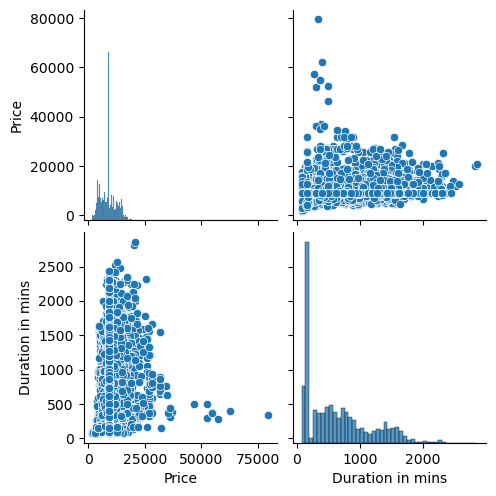

In [87]:
sns.pairplot(data)

In [88]:
data.corr()

C:\Users\radia\AppData\Local\Temp\ipykernel_7740\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Duration in mins
Price,1.000000,0.447695
Duration in mins,0.447695,1.000000


C:\Users\radia\AppData\Local\Temp\ipykernel_7740\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

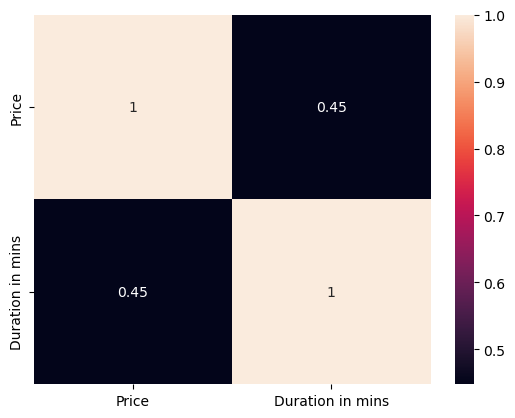

In [89]:
sns.heatmap(data.corr(),annot=True)

In [90]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,22,20,March
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,5,50,January
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,9,25,September
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,18,05,December
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,16,50,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,20,30,June
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,14,20,March
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,21,50,June
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,04,00,June


In [91]:
data['Dep_Time in hrs']

0       22
1        5
2        9
3       18
4       16
        ..
2666    20
2667    14
2668    21
2669    04
2670    04
Name: Dep_Time in hrs, Length: 13133, dtype: object

In [92]:
data['Dep_Time in hrs']=data['Dep_Time in hrs'].astype('int')

In [93]:
data['Dep_Time in hrs']

0       22
1        5
2        9
3       18
4       16
        ..
2666    20
2667    14
2668    21
2669     4
2670     4
Name: Dep_Time in hrs, Length: 13133, dtype: int32

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13133 non-null  object 
 1   Date_of_Journey   13133 non-null  object 
 2   Source            13133 non-null  object 
 3   Destination       13133 non-null  object 
 4   Route             13133 non-null  object 
 5   Total_Stops       13133 non-null  object 
 6   Additional_Info   13133 non-null  object 
 7   Price             13133 non-null  float64
 8   source            13133 non-null  object 
 9   Duration in mins  13133 non-null  int64  
 10  Dep_Time in hrs   13133 non-null  int32  
 11  Dep_Time in mins  13133 non-null  object 
 12  Month_of_Journey  13133 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(10)
memory usage: 1.4+ MB


In [95]:
data['Dep_Time in hrs'].unique()

array([22,  5,  9, 18, 16,  8, 11, 20, 21, 17, 14,  4,  7, 10, 15,  6, 19,
       23, 13,  2, 12,  0,  1,  3])

In [96]:
data['Dep_Time in hrs'].replace({0:'0AM',1:'1AM',2:'2AM',3:'3AM',4:'4AM',5:'5AM',6:'6AM',7:'7AM',8:'8AM',9:'9AM',10:'10AM',11:'11AM'})

0        22
1       5AM
2       9AM
3        18
4        16
       ... 
2666     20
2667     14
2668     21
2669    4AM
2670    4AM
Name: Dep_Time in hrs, Length: 13133, dtype: object

In [97]:
data['Dep_Time in htclass']=data['Dep_Time in hrs'].replace({0:'0AM',1:'1AM',2:'2AM',3:'3AM',4:'4AM',5:'5AM',6:'6AM',7:'7AM',8:'8AM',9:'9AM',10:'10AM',11:'11AM'})

In [98]:
data['Dep_Time in htclass'].unique()

array([22, '5AM', '9AM', 18, 16, '8AM', '11AM', 20, 21, 17, 14, '4AM',
       '7AM', '10AM', 15, '6AM', 19, 23, 13, '2AM', 12, '0AM', '1AM',
       '3AM'], dtype=object)

In [99]:
data['Dep_Time in htclass'].replace({12:'12PM',13:'13PM',14:'14PM',15:'15PM',16:'16PM',17:'17PM',18:'18PM',19:'19PM',20:'20PM',21:'21PM',22:'22PM',23:'23PM'})

0       22PM
1        5AM
2        9AM
3       18PM
4       16PM
        ... 
2666    20PM
2667    14PM
2668    21PM
2669     4AM
2670     4AM
Name: Dep_Time in htclass, Length: 13133, dtype: object

In [100]:
data['Dep_Time in htclass']=data['Dep_Time in htclass'].replace({12:'12PM',13:'13PM',14:'14PM',15:'15PM',16:'16PM',17:'17PM',18:'18PM',19:'19PM',20:'20PM',21:'21PM',22:'22PM',23:'23PM'})

In [101]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey,Dep_Time in htclass
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,22,20,March,22PM
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,5,50,January,5AM
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,9,25,September,9AM
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,18,05,December,18PM
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,16,50,January,16PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,20,30,June,20PM
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,14,20,March,14PM
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,21,50,June,21PM
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,4,00,June,4AM


In [102]:
data['Dep_Time in htclass'].unique()

array(['22PM', '5AM', '9AM', '18PM', '16PM', '8AM', '11AM', '20PM',
       '21PM', '17PM', '14PM', '4AM', '7AM', '10AM', '15PM', '6AM',
       '19PM', '23PM', '13PM', '2AM', '12PM', '0AM', '1AM', '3AM'],
      dtype=object)

In [103]:
data['Dep_Time in htclass'].replace({'0AM':'midnight','1AM':'midnight','2AM':'midnight','3AM':'early morning','4AM':'early morning',
                              '5AM':'early morning','6AM':'early morning','7AM':'early morning','8AM':'late morning','9AM':'late morning',
                              '10AM':'late morning','11AM':'late morning','12PM':'afternoon','13PM':'afternoon','14PM':'afternoon',
                              '15PM':'afternoon','16PM':'evening','17PM':'evening','18PM':'evening','19PM':'night',
                               '20PM':'night','21PM':'night','22PM':'night','23PM':'night'})

0               night
1       early morning
2        late morning
3             evening
4             evening
            ...      
2666            night
2667        afternoon
2668            night
2669    early morning
2670    early morning
Name: Dep_Time in htclass, Length: 13133, dtype: object

In [104]:
data['Dep_Time in htclass']=data['Dep_Time in htclass'].replace({'0AM':'midnight','1AM':'midnight','2AM':'midnight','3AM':'early morning','4AM':'early morning',
                              '5AM':'early morning','6AM':'early morning','7AM':'early morning','8AM':'late morning','9AM':'late morning',
                              '10AM':'late morning','11AM':'late morning','12PM':'noon','13PM':'noon','14PM':'afternoon',
                              '15PM':'afternoon','16PM':'evening','17PM':'evening','18PM':'evening','19PM':'night',
                               '20PM':'night','21PM':'night','22PM':'night','23PM':'night'})

In [105]:
data['Dep_Time in htclass'].unique()

array(['night', 'early morning', 'late morning', 'evening', 'afternoon',
       'noon', 'midnight'], dtype=object)

In [106]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Dep_Time in hrs,Dep_Time in mins,Month_of_Journey,Dep_Time in htclass
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,22,20,March,night
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,5,50,January,early morning
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,9,25,September,late morning
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,18,05,December,evening
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,16,50,January,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,20,30,June,night
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,14,20,March,afternoon
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,21,50,June,night
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,4,00,June,early morning


In [107]:
data.drop(columns=['Dep_Time in hrs','Dep_Time in mins'],inplace=True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  object 
 1   Date_of_Journey      13133 non-null  object 
 2   Source               13133 non-null  object 
 3   Destination          13133 non-null  object 
 4   Route                13133 non-null  object 
 5   Total_Stops          13133 non-null  object 
 6   Additional_Info      13133 non-null  object 
 7   Price                13133 non-null  float64
 8   source               13133 non-null  object 
 9   Duration in mins     13133 non-null  int64  
 10  Month_of_Journey     13133 non-null  object 
 11  Dep_Time in htclass  13133 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.3+ MB


In [109]:
data['Date_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).day

C:\Users\radia\AppData\Local\Temp\ipykernel_7740\2560904816.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_Journey']=pd.DatetimeIndex(data['Date_of_Journey']).day


In [110]:
data['Date_Journey']

0       24
1        5
2        6
3        5
4        3
        ..
2666     6
2667    27
2668     3
2669     3
2670    15
Name: Date_Journey, Length: 13133, dtype: int64

In [111]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Date_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,24
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,6
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,27
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,3
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,3


In [112]:
data[['Date_of_Journey','Month_of_Journey','Date_Journey']]

,Date_of_Journey,Month_of_Journey,Date_Journey
0,24/03/2019,March,24
1,01/05/2019,January,5
2,09/06/2019,September,6
3,12/05/2019,December,5
4,01/03/2019,January,3
...,...,...,...
2666,6/06/2019,June,6
2667,27/03/2019,March,27
2668,6/03/2019,June,3
2669,6/03/2019,June,3


In [113]:
data[['Month_of_Journey','Date_Journey']]

,Month_of_Journey,Date_Journey
0,March,24
1,January,5
2,September,6
3,December,5
4,January,3
...,...,...
2666,June,6
2667,March,27
2668,June,3
2669,June,3


In [114]:
import datetime as date

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  object 
 1   Date_of_Journey      13133 non-null  object 
 2   Source               13133 non-null  object 
 3   Destination          13133 non-null  object 
 4   Route                13133 non-null  object 
 5   Total_Stops          13133 non-null  object 
 6   Additional_Info      13133 non-null  object 
 7   Price                13133 non-null  float64
 8   source               13133 non-null  object 
 9   Duration in mins     13133 non-null  int64  
 10  Month_of_Journey     13133 non-null  object 
 11  Dep_Time in htclass  13133 non-null  object 
 12  Date_Journey         13133 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.4+ MB


In [116]:
pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek

C:\Users\radia\AppData\Local\Temp\ipykernel_7740\1057304681.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek


Int64Index([6, 5, 4, 3, 3, 0, 1, 3, 1, 0,
            ...
            2, 1, 3, 5, 4, 3, 2, 0, 0, 5],
           dtype='int64', name='Date_of_Journey', length=13133)

In [117]:
data['Day_of_Journey']=pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek

C:\Users\radia\AppData\Local\Temp\ipykernel_7740\2980857057.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Day_of_Journey']=pd.PeriodIndex(data['Date_of_Journey'],freq='D').dayofweek


In [118]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Date_Journey,Day_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,24,6
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,5,5
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,6,4
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,5,3
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,6,3
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,27,2
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,3,0
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,3,0


In [119]:
data[['Date_of_Journey','Month_of_Journey','Date_Journey','Day_of_Journey']]

,Date_of_Journey,Month_of_Journey,Date_Journey,Day_of_Journey
0,24/03/2019,March,24,6
1,01/05/2019,January,5,5
2,09/06/2019,September,6,4
3,12/05/2019,December,5,3
4,01/03/2019,January,3,3
...,...,...,...,...
2666,6/06/2019,June,6,3
2667,27/03/2019,March,27,2
2668,6/03/2019,June,3,0
2669,6/03/2019,June,3,0


In [120]:
data['Day_of_Journey'].unique()

array([6, 5, 4, 3, 0, 1, 2], dtype=int64)

In [121]:
data['Day_of_Journey'].replace({6:'Sunday',5:'Saturday',4:'Friday',3:'Thursday',2:'Wednesday',1:'Tuesday',0:'Monday'})

0          Sunday
1        Saturday
2          Friday
3        Thursday
4        Thursday
          ...    
2666     Thursday
2667    Wednesday
2668       Monday
2669       Monday
2670     Saturday
Name: Day_of_Journey, Length: 13133, dtype: object

In [122]:
data['Day_of_Journey']=data['Day_of_Journey'].replace({6:'Sunday',5:'Saturday',4:'Friday',3:'Thursday',2:'Wednesday',1:'Tuesday',0:'Monday'})

In [123]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Date_Journey,Day_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,24,Sunday
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,5,Saturday
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,6,Friday
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,5,Thursday
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,6,Thursday
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,27,Wednesday
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,3,Monday
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,3,Monday


In [124]:
data.drop(columns=['Date_Journey'],inplace=True)

In [125]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,Sunday
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,Saturday
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,Friday
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,Thursday
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,Thursday
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,Wednesday
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,Monday
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,Monday


In [126]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [127]:
data['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

0       0
1       2
2       2
3       1
4       1
       ..
2666    1
2667    0
2668    1
2669    1
2670    1
Name: Total_Stops, Length: 13133, dtype: int64

In [128]:
data['Totalno_Stops']=data['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [129]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey,Totalno_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897.000000,train,170,March,night,Sunday,0
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662.000000,train,445,January,early morning,Saturday,2
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882.000000,train,1140,September,late morning,Friday,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218.000000,train,325,December,evening,Thursday,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302.000000,train,285,January,evening,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,1 stop,No info,9026.790289,test,1435,June,night,Thursday,1
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9026.790289,test,155,March,afternoon,Wednesday,0
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,395,June,night,Monday,1
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9026.790289,test,915,June,early morning,Monday,1


In [130]:
data.drop(columns=['Total_Stops'],inplace=True)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13133 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13133 non-null  object 
 1   Date_of_Journey      13133 non-null  object 
 2   Source               13133 non-null  object 
 3   Destination          13133 non-null  object 
 4   Route                13133 non-null  object 
 5   Additional_Info      13133 non-null  object 
 6   Price                13133 non-null  float64
 7   source               13133 non-null  object 
 8   Duration in mins     13133 non-null  int64  
 9   Month_of_Journey     13133 non-null  object 
 10  Dep_Time in htclass  13133 non-null  object 
 11  Day_of_Journey       13133 non-null  object 
 12  Totalno_Stops        13133 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.4+ MB


In [132]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [133]:
data[data['Airline']=='Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey,Totalno_Stops
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,No info,52229.000000,train,300,January,early morning,Thursday,1
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Business class,79512.000000,train,340,January,early morning,Thursday,1
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Business class,62427.000000,train,400,January,early morning,Thursday,1
7351,Jet Airways Business,03/03/2019,Delhi,Cochin,DEL ? ATQ ? BOM ? COK,No info,46490.000000,train,500,March,night,Sunday,2
9715,Jet Airways Business,06/03/2019,Delhi,Cochin,DEL ? ATQ ? BOM ? COK,No info,52285.000000,train,500,June,night,Monday,2
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? MAA ? DEL,Business class,57209.000000,train,280,January,late morning,Thursday,1
1802,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,Business class,9026.790289,test,450,January,early morning,Thursday,1
1819,Jet Airways Business,03/03/2019,Banglore,New Delhi,BLR ? DEL,No info,9026.790289,test,160,March,night,Sunday,0


In [134]:
data['Airline'].replace({'Jet Airways Business': 'Jet Airways'})

0                  IndiGo
1               Air India
2             Jet Airways
3                  IndiGo
4                  IndiGo
              ...        
2666            Air India
2667               IndiGo
2668          Jet Airways
2669            Air India
2670    Multiple carriers
Name: Airline, Length: 13133, dtype: object

In [135]:
data['Airline']=data['Airline'].replace({'Jet Airways Business': 'Jet Airways'})

In [136]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

In [137]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey,Totalno_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,No info,3897.000000,train,170,March,night,Sunday,0
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,7662.000000,train,445,January,early morning,Saturday,2
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,13882.000000,train,1140,September,late morning,Friday,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,No info,6218.000000,train,325,December,evening,Thursday,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,No info,13302.000000,train,285,January,evening,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,No info,9026.790289,test,1435,June,night,Thursday,1
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,No info,9026.790289,test,155,March,afternoon,Wednesday,0
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,No info,9026.790289,test,395,June,night,Monday,1
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,No info,9026.790289,test,915,June,early morning,Monday,1


C:\Users\radia\AppData\Local\Temp\ipykernel_7740\1679999493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<Axes: >

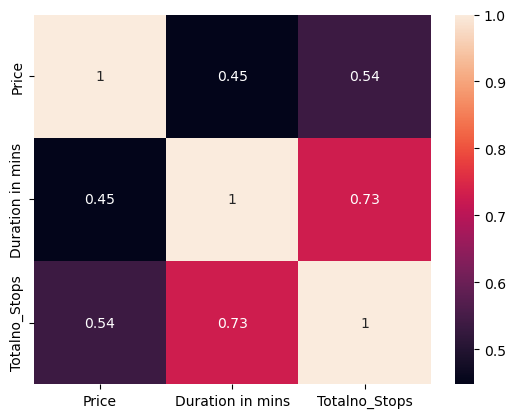

In [138]:
sns.heatmap(data.corr(), annot = True)

In [139]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Additional_Info        0
Price                  0
source                 0
Duration in mins       0
Month_of_Journey       0
Dep_Time in htclass    0
Day_of_Journey         0
Totalno_Stops          0
dtype: int64

In [140]:
data.duplicated().sum()

185

In [141]:
data.drop_duplicates(inplace=True)

In [142]:
data['Totalno_Stops'].value_counts(normalize=True)

1    0.544022
0    0.322057
2    0.129595
3    0.004171
4    0.000154
Name: Totalno_Stops, dtype: float64

In [143]:
data['Totalno_Stops'].value_counts()

1    7044
0    4170
2    1678
3      54
4       2
Name: Totalno_Stops, dtype: int64

In [144]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Additional_Info,Price,source,Duration in mins,Month_of_Journey,Dep_Time in htclass,Day_of_Journey,Totalno_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,No info,3897.000000,train,170,March,night,Sunday,0
1,Air India,01/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,7662.000000,train,445,January,early morning,Saturday,2
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,13882.000000,train,1140,September,late morning,Friday,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,No info,6218.000000,train,325,December,evening,Thursday,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,No info,13302.000000,train,285,January,evening,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,No info,9026.790289,test,1435,June,night,Thursday,1
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,No info,9026.790289,test,155,March,afternoon,Wednesday,0
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,No info,9026.790289,test,395,June,night,Monday,1
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,No info,9026.790289,test,915,June,early morning,Monday,1


In [145]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

<Axes: xlabel='Totalno_Stops'>

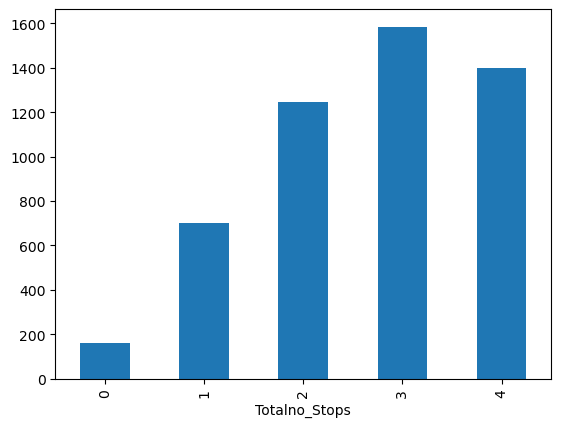

In [146]:
data.groupby('Totalno_Stops')['Duration in mins'].median().plot(kind = 'bar')

<Axes: xlabel='Totalno_Stops'>

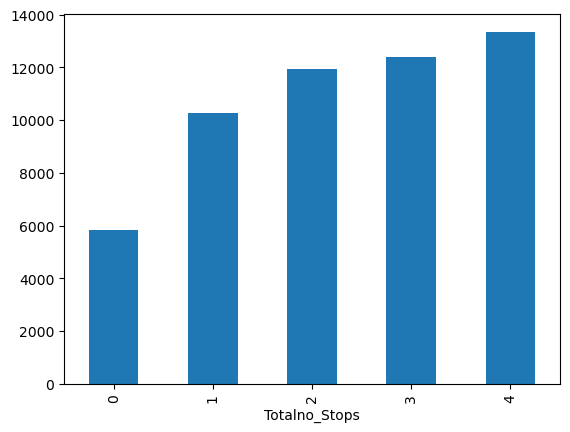

In [147]:
data.groupby('Totalno_Stops')['Price'].mean().plot(kind='bar')

<Axes: xlabel='Totalno_Stops', ylabel='Price'>

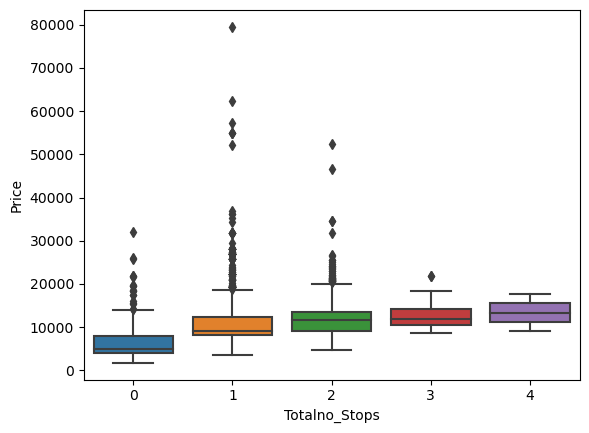

In [148]:
sns.boxplot(x='Totalno_Stops',y='Price',data=data)

In [149]:
data['Price'].value_counts()

9026.790289     2620
10262.000000     258
10844.000000     212
7229.000000      160
4804.000000      136
                ... 
8925.000000        1
11774.000000       1
16497.000000       1
8853.000000        1
15586.000000       1
Name: Price, Length: 1871, dtype: int64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12948 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              12948 non-null  object 
 1   Date_of_Journey      12948 non-null  object 
 2   Source               12948 non-null  object 
 3   Destination          12948 non-null  object 
 4   Route                12948 non-null  object 
 5   Additional_Info      12948 non-null  object 
 6   Price                12948 non-null  float64
 7   source               12948 non-null  object 
 8   Duration in mins     12948 non-null  int64  
 9   Month_of_Journey     12948 non-null  object 
 10  Dep_Time in htclass  12948 non-null  object 
 11  Day_of_Journey       12948 non-null  object 
 12  Totalno_Stops        12948 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.4+ MB


In [151]:
data['Price']=data['Price'].astype('int')

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12948 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              12948 non-null  object
 1   Date_of_Journey      12948 non-null  object
 2   Source               12948 non-null  object
 3   Destination          12948 non-null  object
 4   Route                12948 non-null  object
 5   Additional_Info      12948 non-null  object
 6   Price                12948 non-null  int32 
 7   source               12948 non-null  object
 8   Duration in mins     12948 non-null  int64 
 9   Month_of_Journey     12948 non-null  object
 10  Dep_Time in htclass  12948 non-null  object
 11  Day_of_Journey       12948 non-null  object
 12  Totalno_Stops        12948 non-null  int64 
dtypes: int32(1), int64(2), object(10)
memory usage: 1.3+ MB


In [153]:
X=data.drop(columns=['Price','Airline','Date_of_Journey','Source','Destination','Route','Additional_Info','source',
                    'Month_of_Journey','Dep_Time in htclass','Day_of_Journey'])
y=data['Price']

In [154]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=42)

In [155]:
model_dt = DecisionTreeClassifier()

In [156]:
model_dt.fit(train_X,train_y)

DecisionTreeClassifier()

In [157]:
from sklearn import tree

In [158]:
text_representation=tree.export_text(model_dt)
print(text_representation)

|--- feature_0 <= 187.50
|   |--- feature_0 <= 162.50
|   |   |--- feature_0 <= 115.00
|   |   |   |--- feature_0 <= 82.50
|   |   |   |   |--- feature_0 <= 77.50
|   |   |   |   |   |--- class: 3100
|   |   |   |   |--- feature_0 >  77.50
|   |   |   |   |   |--- class: 3100
|   |   |   |--- feature_0 >  82.50
|   |   |   |   |--- feature_0 <= 92.50
|   |   |   |   |   |--- feature_0 <= 87.50
|   |   |   |   |   |   |--- class: 9026
|   |   |   |   |   |--- feature_0 >  87.50
|   |   |   |   |   |   |--- class: 9026
|   |   |   |   |--- feature_0 >  92.50
|   |   |   |   |   |--- class: 2227
|   |   |--- feature_0 >  115.00
|   |   |   |--- feature_0 <= 142.50
|   |   |   |   |--- feature_0 <= 137.50
|   |   |   |   |   |--- class: 3543
|   |   |   |   |--- feature_0 >  137.50
|   |   |   |   |   |--- class: 3597
|   |   |   |--- feature_0 >  142.50
|   |   |   |   |--- feature_0 <= 152.50
|   |   |   |   |   |--- feature_0 <= 147.50
|   |   |   |   |   |   |--- class: 3841
|   |   | 

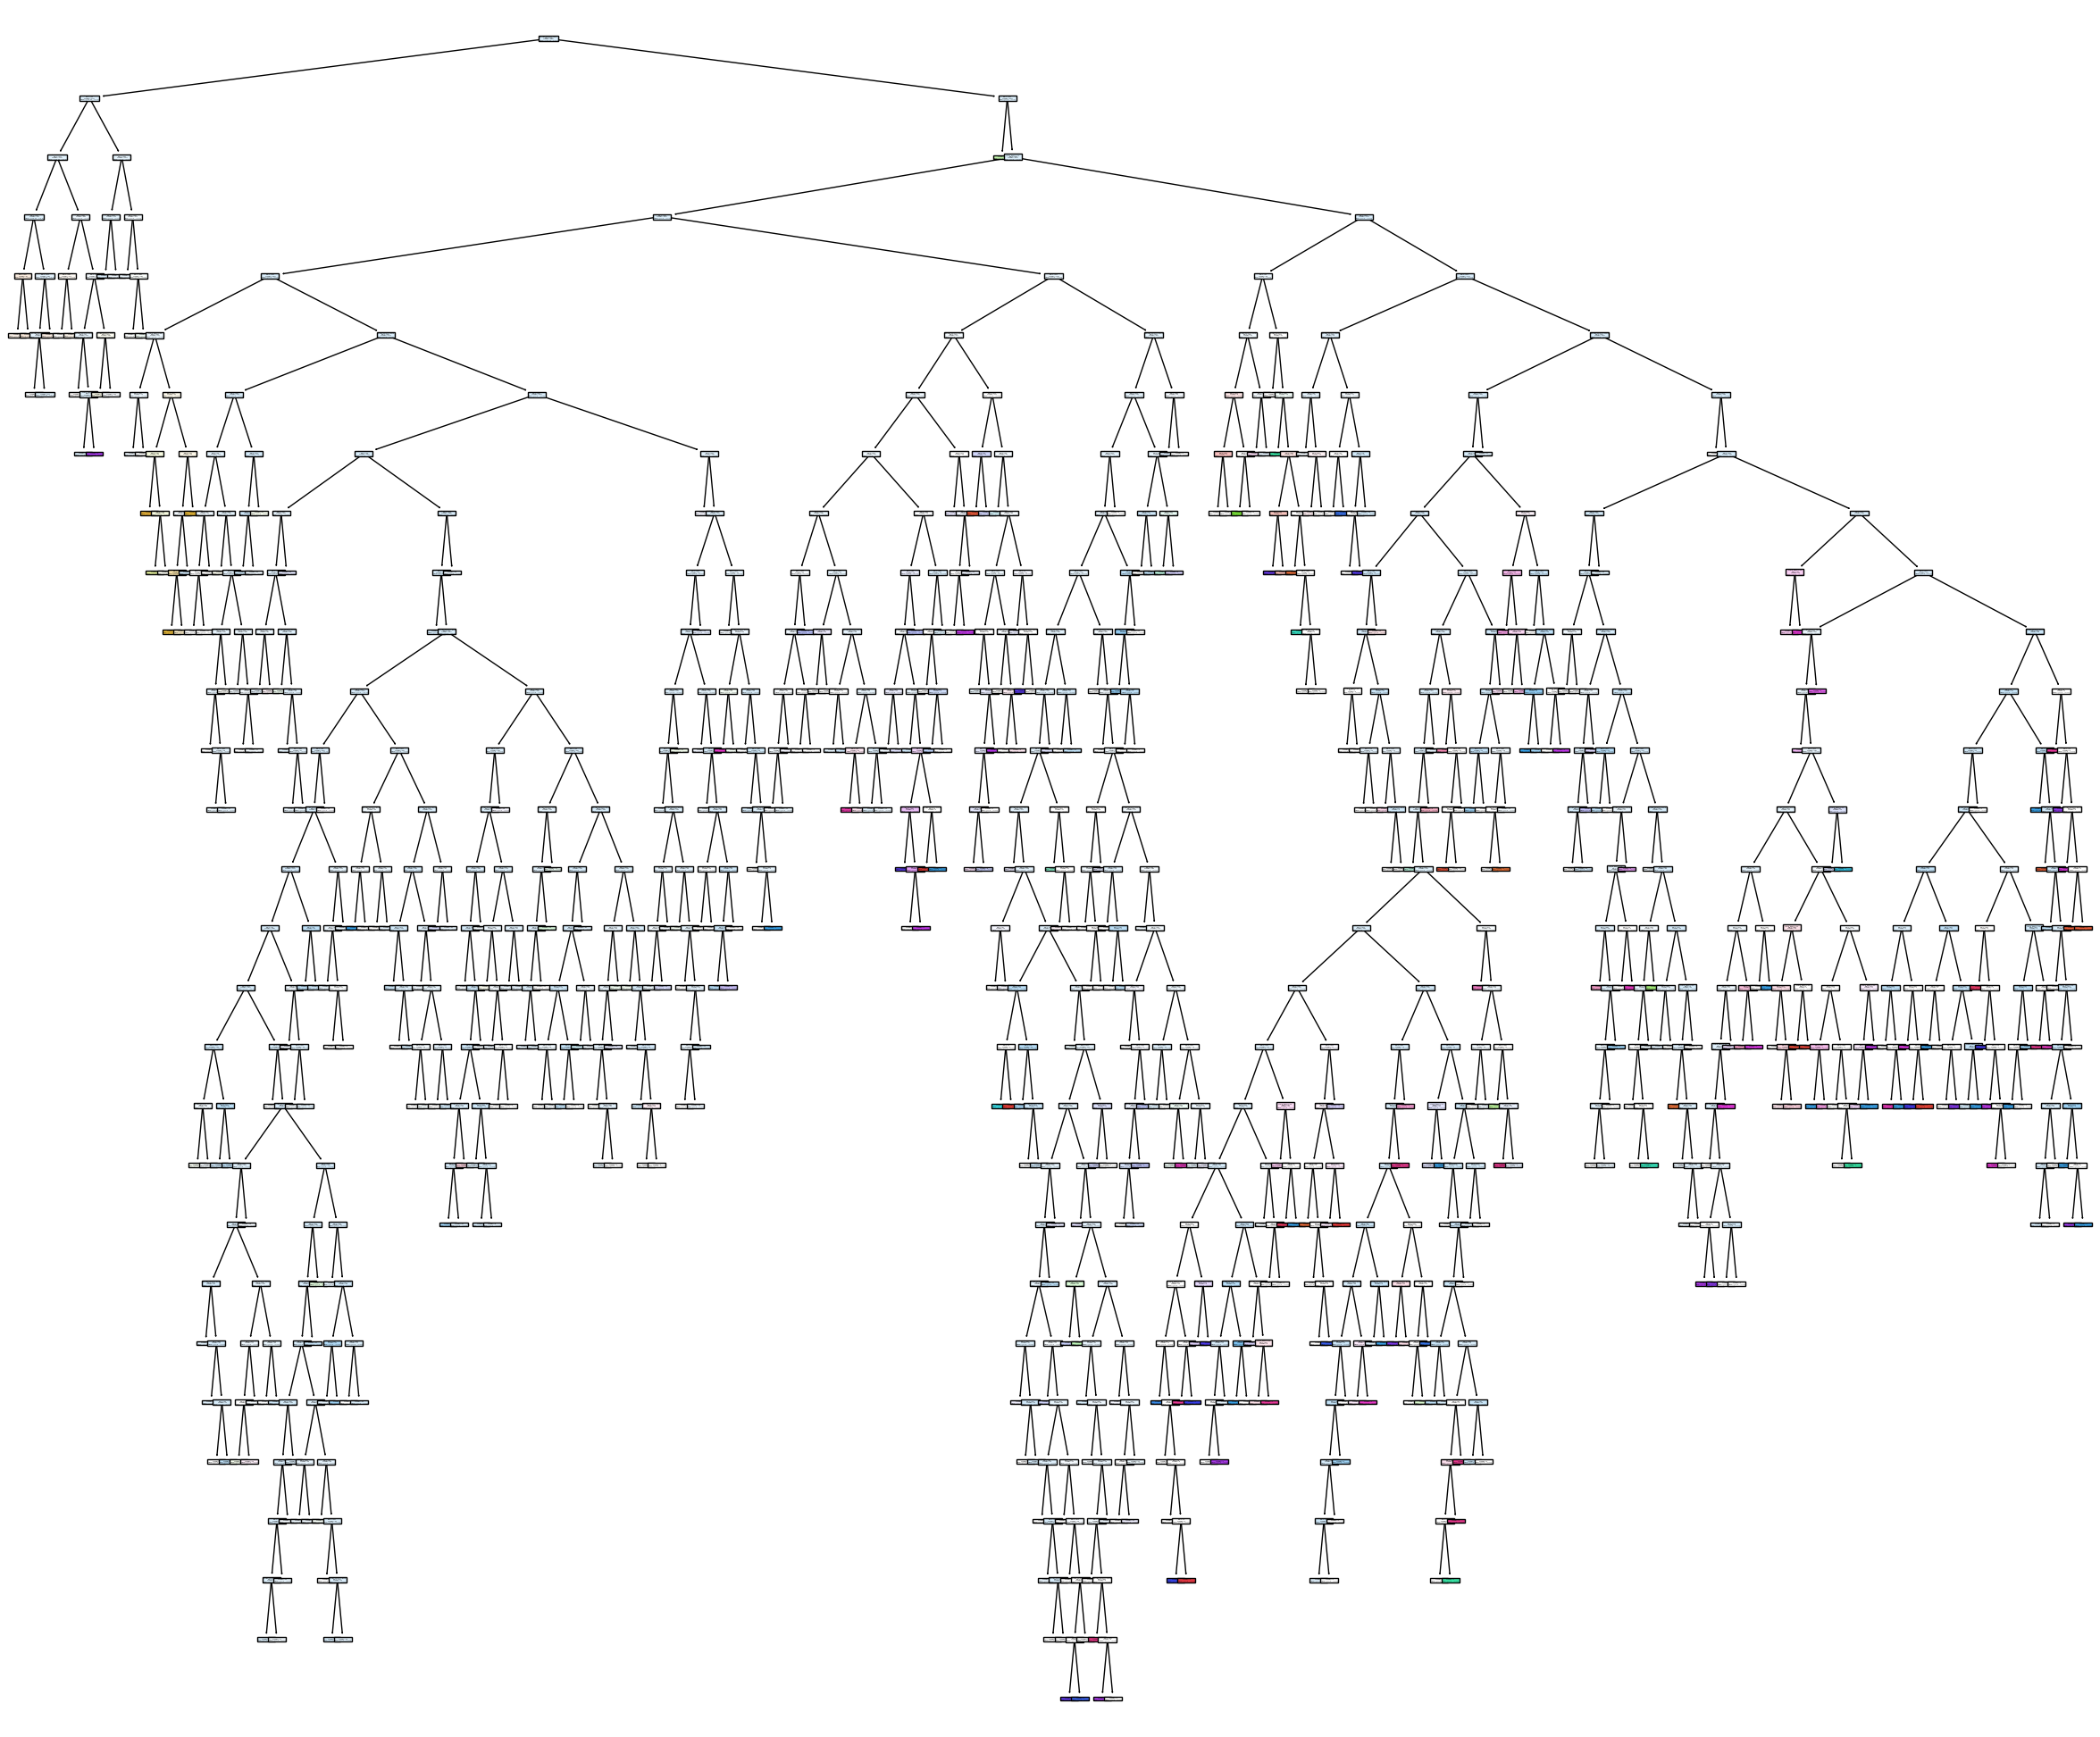

In [159]:
fig=plt.figure(figsize=(30,25))
_ = tree.plot_tree(model_dt, feature_names=train_X.columns, filled=True)

In [160]:
train_predict=model_dt.predict(train_X)
print(confusion_matrix(train_y,train_predict))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [161]:
print(classification_report(train_y,train_predict))

              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         3
        1965       0.00      0.00      0.00        24
        2017       0.00      0.00      0.00        22
        2050       0.00      0.00      0.00         9
        2071       0.00      0.00      0.00         5
        2175       0.00      0.00      0.00         6
        2227       0.54      0.27      0.36        26
        2228       0.00      0.00      0.00         7
        2385       0.00      0.00      0.00         5
        2437       0.00      0.00      0.00         5
        2470       0.00      0.00      0.00         3
        2575       0.00      0.00      0.00         8
        2647       0.00      0.00      0.00         3
        2753       0.00      0.00      0.00         7
        2754       0.00      0.00      0.00        40
        2759       0.00      0.00      0.00         2
        3100       0.33      0.72      0.46        40
        3145       0.00    

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
test_predict=model_dt.predict(test_X)
print(confusion_matrix(test_y,test_predict))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [163]:
scale=StandardScaler()

In [164]:
train_X = pd.DataFrame(scale.fit_transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scale.fit_transform(test_X), columns = test_X.columns)

In [165]:
train_X

,Duration in mins,Totalno_Stops
0,-0.936799,-1.250804
1,-0.926813,-1.250804
2,-0.926813,-1.250804
3,-0.587294,0.274497
4,-0.687152,0.274497
...,...,...
9058,-1.096573,-1.250804
9059,-1.096573,-1.250804
9060,-0.936799,-1.250804
9061,0.221561,0.274497


In [166]:
test_X

,Duration in mins,Totalno_Stops
0,-0.918512,-1.203696
1,1.462759,0.286539
2,0.057909,0.286539
3,0.117690,0.286539
4,2.130312,1.776775
...,...,...
3880,-0.350594,0.286539
3881,-0.669425,0.286539
3882,-0.141361,1.776775
3883,0.037982,0.286539


In [167]:
def model_result(model_dt, train_X, test_X, train_y, test_y):
    model_dt.fit(train_X,train_y)
    train_pred = model_dt.predict(train_X)
    print('Train Confusion Matrix')
    print(confusion_matrix(train_y, train_pred))
    print('Test Confusion Matrix')
    test_pred = model_dt.predict(test_X)
    print(confusion_matrix(test_y, test_pred))
    print(classification_report(train_y, train_pred))
    print(classification_report(test_y, test_pred))

In [168]:
modeldt_scaled=DecisionTreeClassifier()

model_result(modeldt_scaled, train_X, test_X, train_y, test_y)

Train Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         3
        1965       0.00      0.00      0.00        24
        2017       0.00      0.00      0.00        22
        2050       0.00      0.00      0.00         9
        2071       0.00      0.00      0.00         5
        2175       0.00      0.00      0.00         6
        2227       0.54      0.27      0.36        26
        2228       0.00      0.00      0.00         7
        2385       0.00      0.00      0.00         5
        2437       0.00      0.00      0.00         5
        2470       0.00      0.00      0.00         3
        2575       0.00      0.00      0.00         8
        2647       0.00      0.00      0.00         3
        2753       0.00      0.00      0.00         7
        2754       0.00      0.00      0.00        40
        2759       0.00      0.00      0.00         2
        3100       0.33      0.72      0.46        40
        3145       0.00    

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\li

In [169]:
sample = RandomUnderSampler()
train_X_sample, train_y_sample = sample.fit_resample(train_X, train_y)


<Axes: >

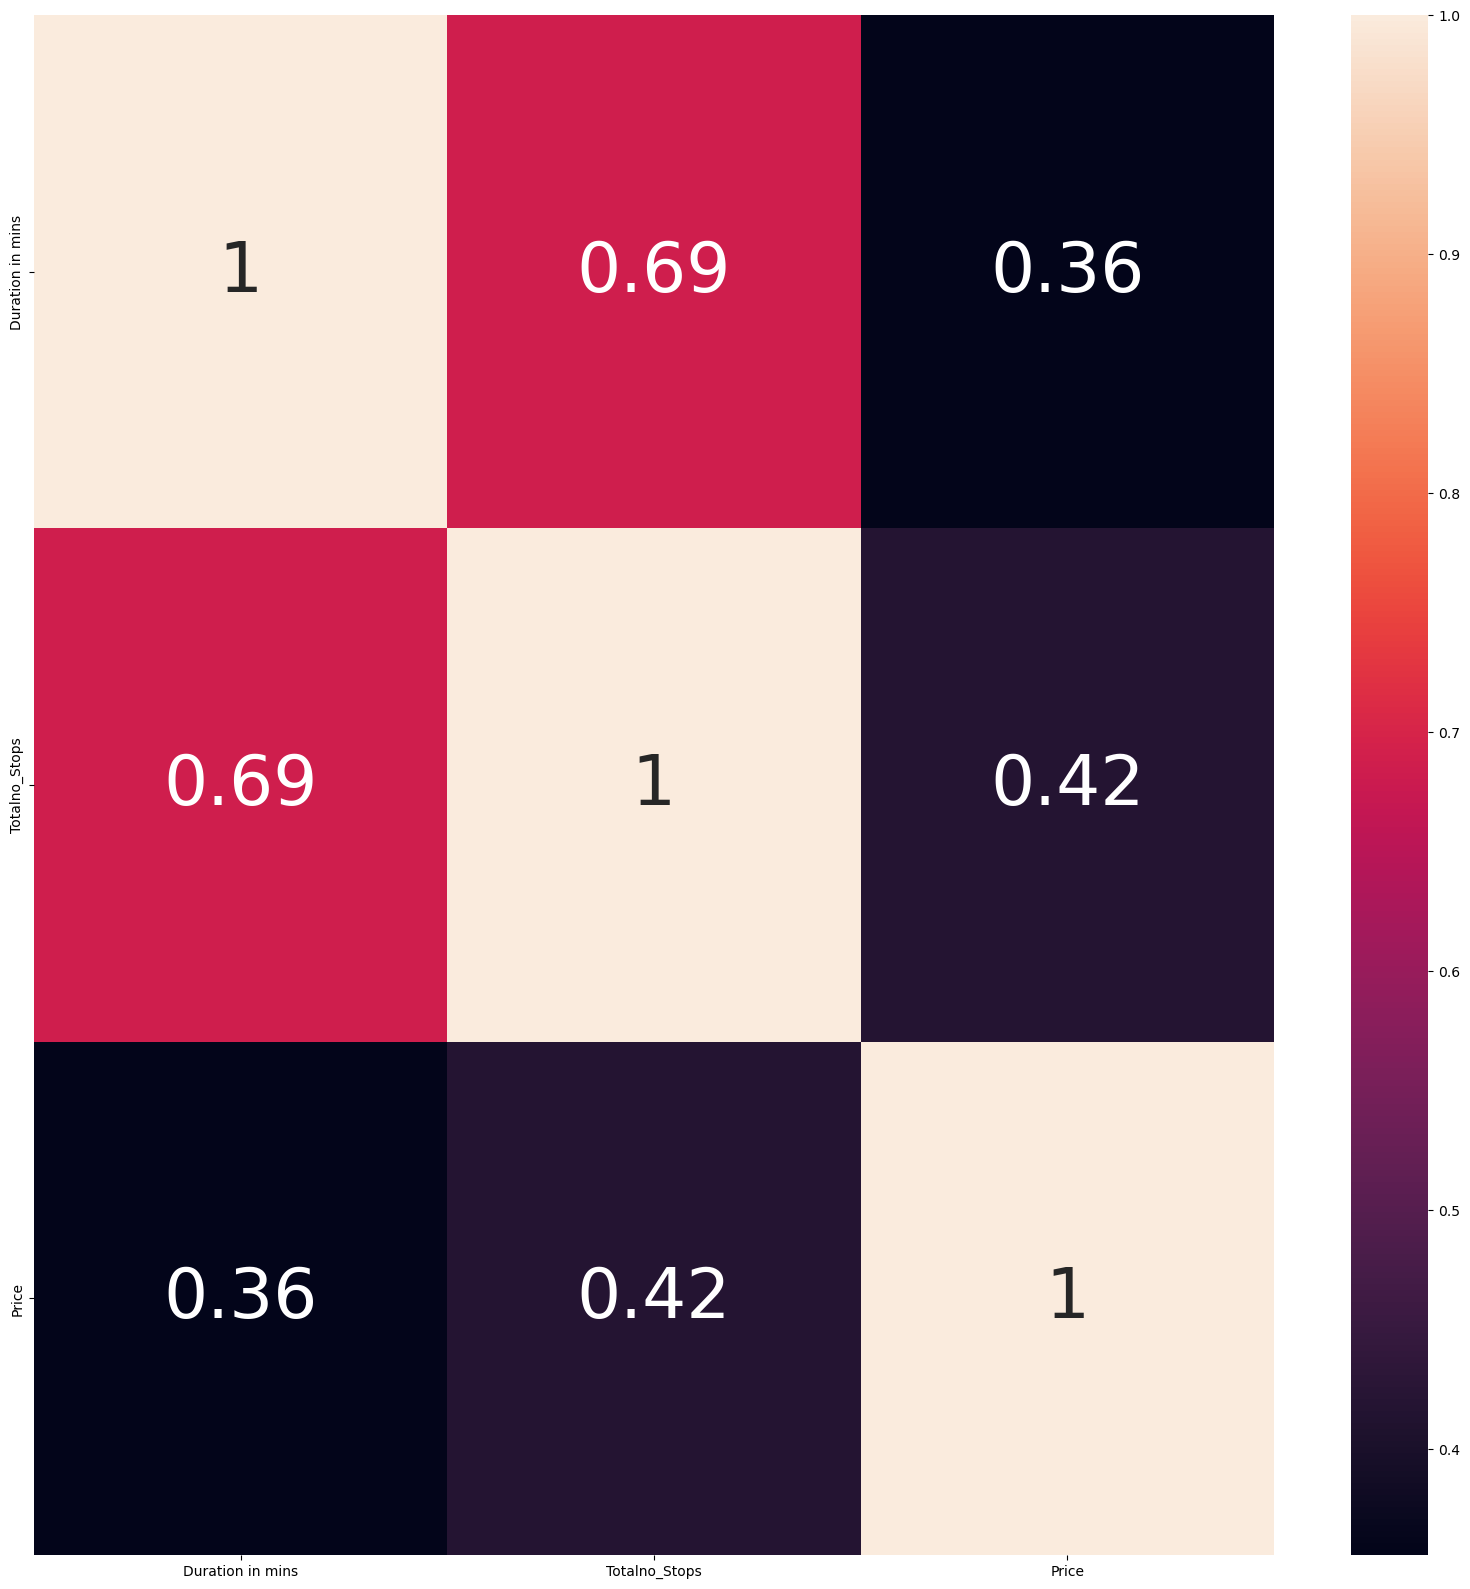

In [170]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.concat([train_X_sample, train_y_sample], axis  =1).corr(), annot = True,annot_kws={'size':50})

In [171]:
model_dt_scaled = DecisionTreeClassifier()

model_result(model_dt_scaled, train_X_sample, test_X, train_y_sample, test_y)

Train Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1759       0.08      1.00      0.14         1
        1965       0.04      1.00      0.08         1
        2017       0.00      0.00      0.00         1
        2050       0.12      1.00      0.22         1
        2071       0.00      0.00      0.00         1
        2175       0.00      0.00      0.00         1
        2227       1.00      1.00      1.00         1
        2228       0.00      0.00      0.00         1
        2385       0.00      0.00      0.00         1
        2437       0.00      0.00      0.00         1
        2470       0.00      0.00      0.00         1
        2575       0.00      0.00      0.00         1
        2647

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\ana

              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         1
        1840       0.00      0.00      0.00         1
        1965       0.00      0.00      0.00        12
        2017       0.00      0.00      0.00        13
        2050       0.00      0.00      0.00         1
        2071       0.00      0.00      0.00         1
        2175       0.00      0.00      0.00         1
        2227       0.07      1.00      0.13        14
        2228       0.00      0.00      0.00         2
        2385       0.00      0.00      0.00         1
        2437       0.00      0.00      0.00         1
        2575       0.00      0.00      0.00         1
        2647       0.00      0.00      0.00         2
        2753       0.00      0.00      0.00         3
        2754       0.00      0.00      0.00        15
        2759       0.00      0.00      0.00         2
        3100       0.00      0.00      0.00        18
        3175       0.00    

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-p

In [172]:
model_rf = RandomForestClassifier()
model_result(model_rf, train_X, test_X, train_y, test_y)

Train Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         3
        1965       0.00      0.00      0.00        24
        2017       0.00      0.00      0.00        22
        2050       0.00      0.00      0.00         9
        2071       0.00      0.00      0.00         5
        2175       0.00      0.00      0.00         6
        2227       0.54      0.27      0.36        26
        2228       0.00      0.00      0.00         7
        2385       0.00      0.00      0.00         5
        2437       0.00      0.00      0.00         5
        2470       0.00      0.00      0.00         3
        2575       0.00      0.00      0.00         8
        2647

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         1
        1840       0.00      0.00      0.00         1
        1965       0.00      0.00      0.00        12
        2017       0.00      0.00      0.00        13
        2050       0.00      0.00      0.00         1
        2071       0.00      0.00      0.00         1
        2175       0.00      0.00      0.00         1
        2227       0.07      1.00      0.13        14
        2228       0.00      0.00      0.00         2
        2385       0.00      0.00      0.00         1
        2437       0.00      0.00      0.00         1
        2575       0.00      0.00      0.00         1
        2647       0.00      0.00      0.00         2
        2753       0.00      0.00      0.00         3
        2754       0.00      0.00      0.00        15
        2759       0.00      0.00      0.00         2
        3100       0.00      0.00      0.00        18
        3175       0.00    

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\li

In [173]:
model_rf = RandomForestClassifier(class_weight = 'balanced')
model_result(model_rf, train_X_sample, test_X, train_y_sample, test_y)

Train Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Test Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        1759       0.08      1.00      0.14         1
        1965       0.00      0.00      0.00         1
        2017       0.00      0.00      0.00         1
        2050       0.00      0.00      0.00         1
        2071       0.00      0.00      0.00         1
        2175       0.00      0.00      0.00         1
        2227       1.00      1.00      1.00         1
        2228       0.00      0.00      0.00         1
        2385       0.00      0.00      0.00         1
        2437       0.00      0.00      0.00         1
        2470       0.00      0.00      0.00         1
        2575       0.00      0.00      0.00         1
        2647

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\ana

              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         1
        1840       0.00      0.00      0.00         1
        1965       0.00      0.00      0.00        12
        2017       0.00      0.00      0.00        13
        2050       0.00      0.00      0.00         1
        2071       0.00      0.00      0.00         1
        2175       0.00      0.00      0.00         1
        2227       0.07      1.00      0.13        14
        2228       0.00      0.00      0.00         2
        2385       0.00      0.00      0.00         1
        2437       0.00      0.00      0.00         1
        2575       0.00      0.00      0.00         1
        2647       0.00      0.00      0.00         2
        2753       0.00      0.00      0.00         3
        2754       0.00      0.00      0.00        15
        2759       0.00      0.00      0.00         2
        3100       0.00      0.00      0.00        18
        3175       0.00    

C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\radia\anaconda3\anaconda\li

In [174]:
model_rf[12]

DecisionTreeClassifier(max_features='sqrt', random_state=136385686)

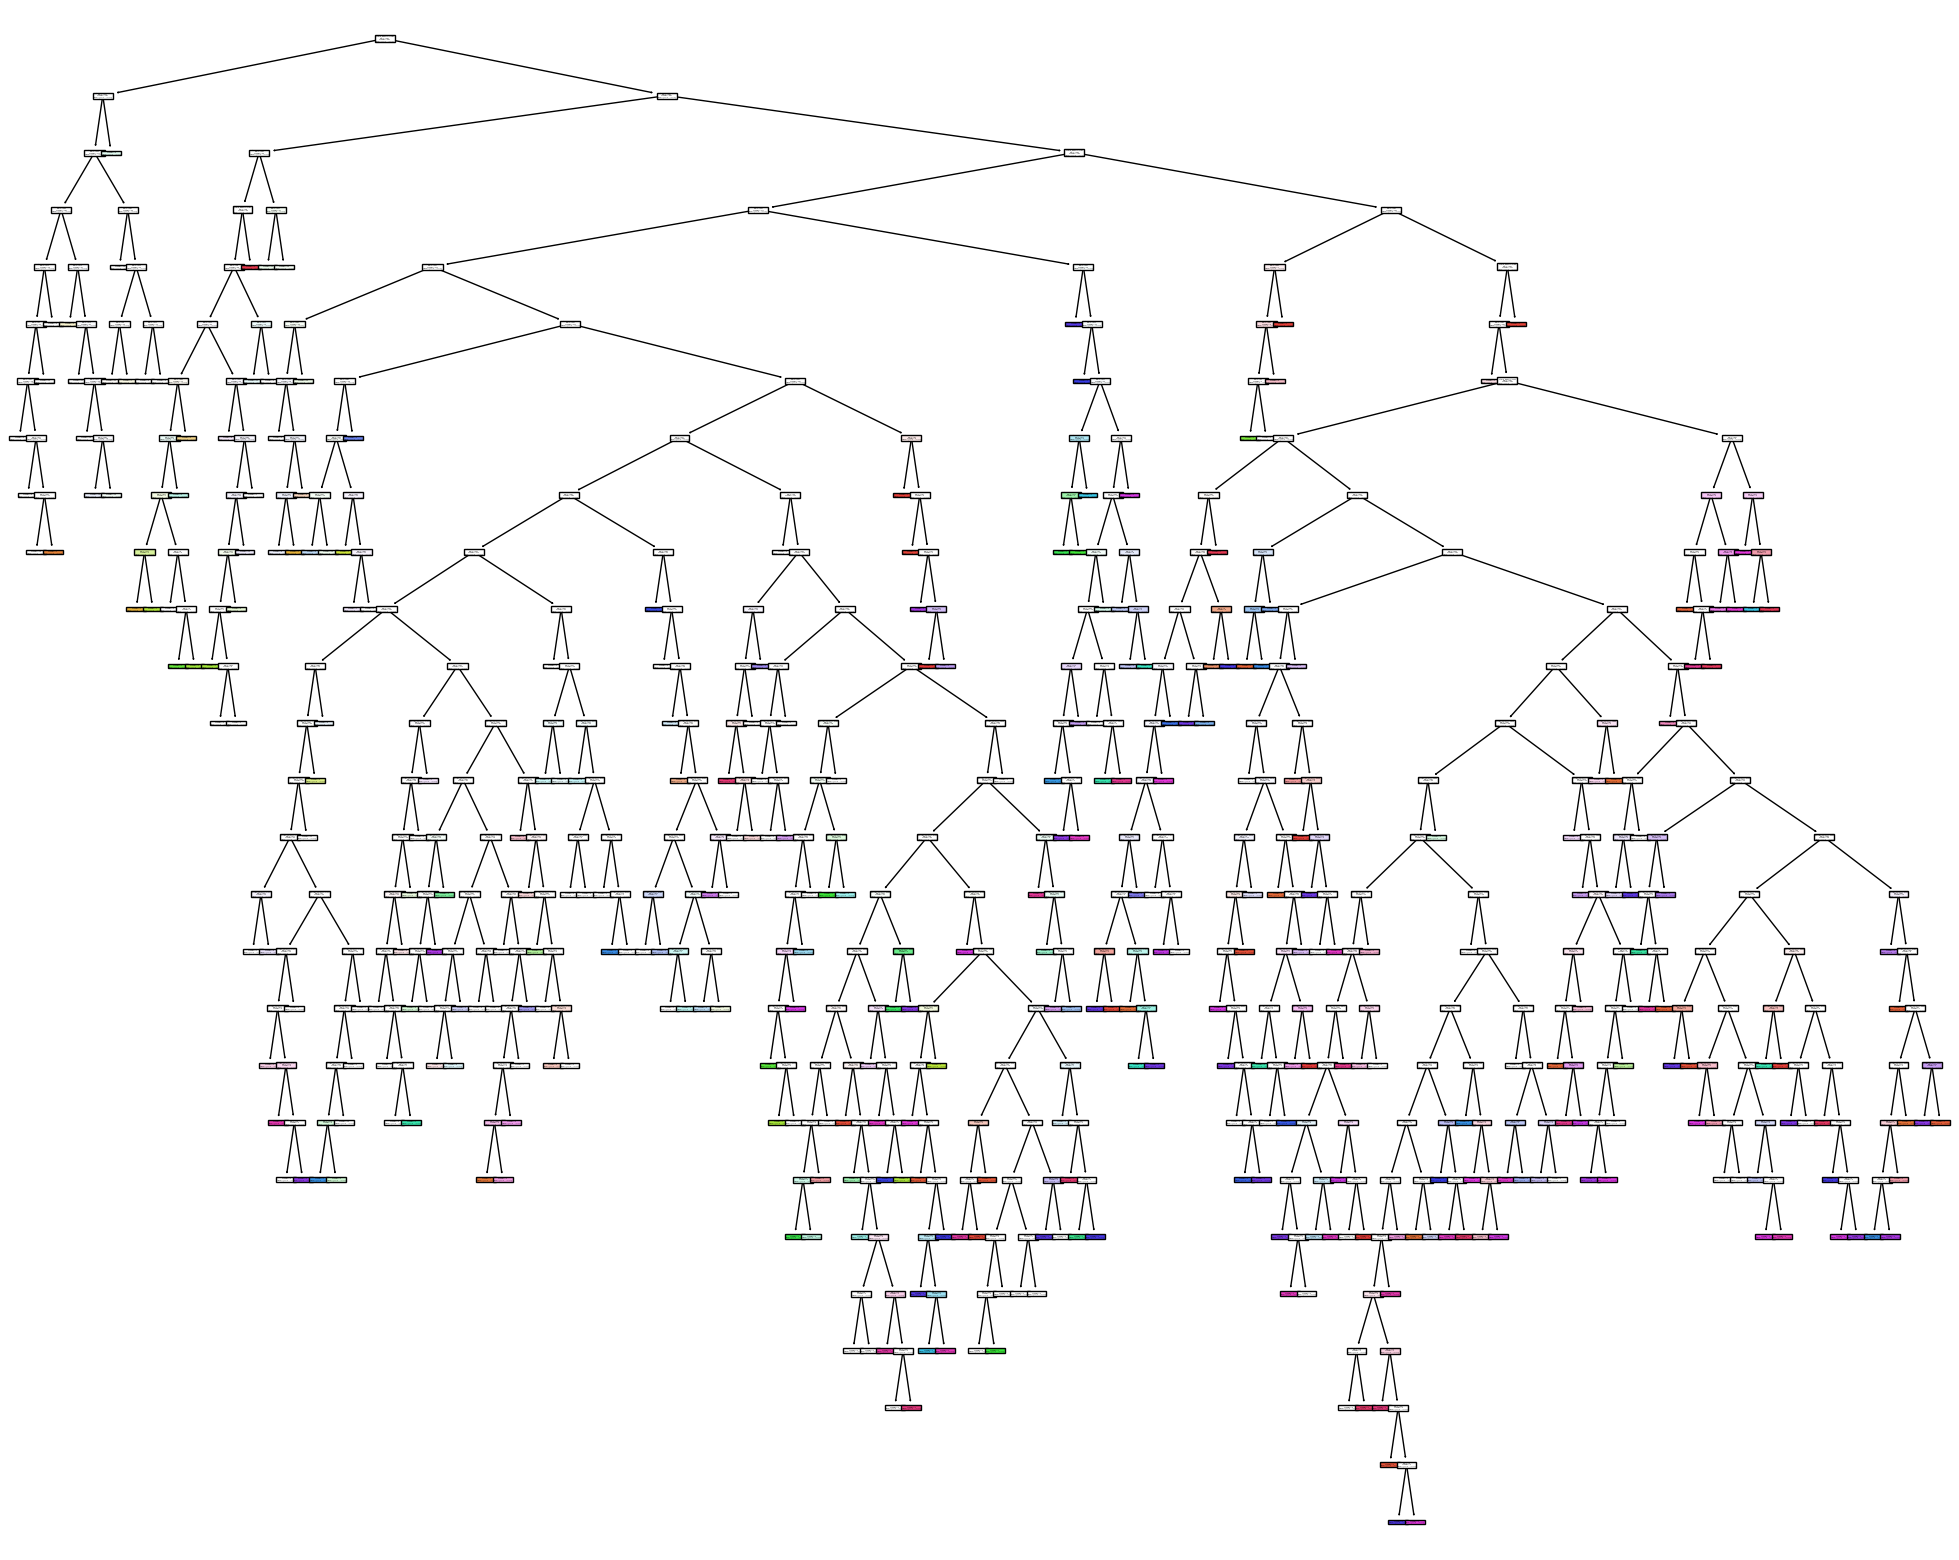

In [175]:
fig = plt.figure(figsize=(25,20))
_1 = tree.plot_tree(model_rf[18], feature_names=train_X.columns, filled=True)